In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

fire_size_classes = pd.unique(df['fire_size_class'])
property = 'fire_size'
s_c = 'C'

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

df_sampled = df.loc[df['fire_size_class'] == s_c]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(0, max_amount, num=20)
kde_values = kernel(x)


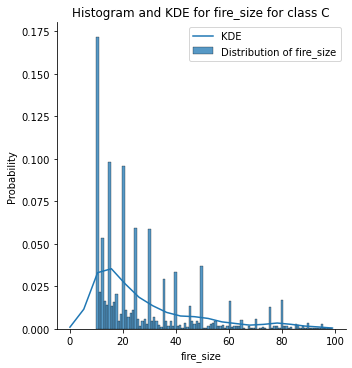

In [2]:
draw_hist_kde(df_sampled, x, s_c, property, kde_values, 100)

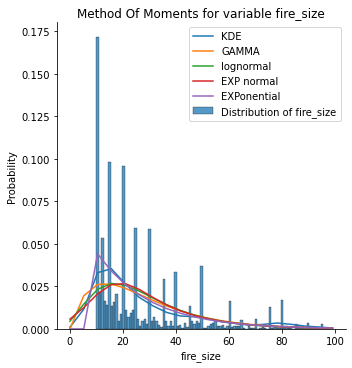

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9906633239504226, pvalue=5.068457470191938e-41), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.48349627131696, pvalue=3.787015145917394e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9743717812816205, pvalue=2.9881227235893374e-32), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.169446459385114, pvalue=1.2971956842022792e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


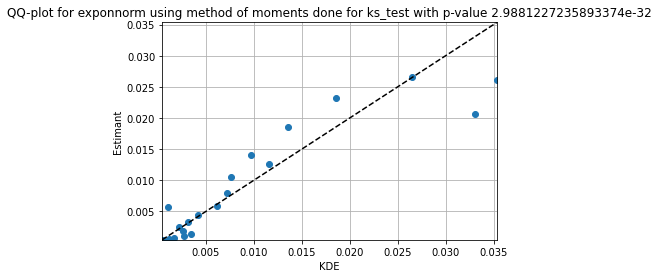

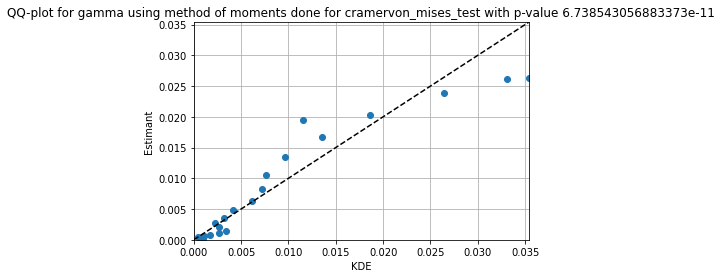

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 100)

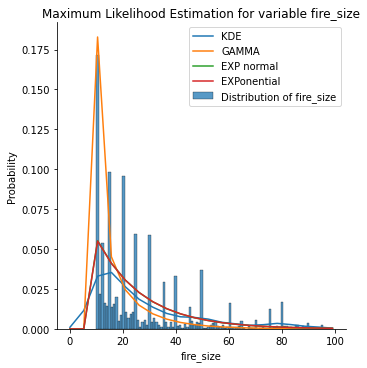

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


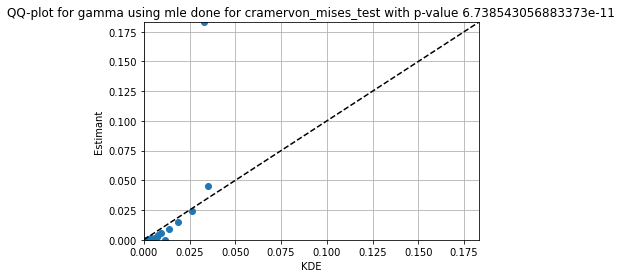

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 100)

[8.25551795e-06 2.76304757e+01 1.99601197e+01]
[ 6.64023684 22.52881538 19.91530588]


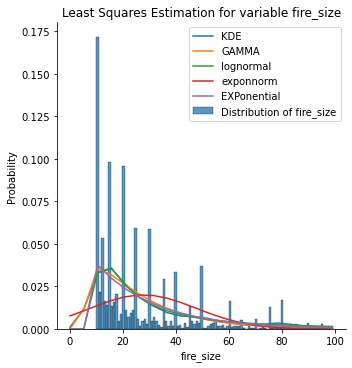

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9165940808597414, pvalue=5.30847943230909e-22), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=5.1401724123066925, pvalue=6.898448479120134e-11)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=6.666666666666666, pvalue=6.738543056883373e-11)


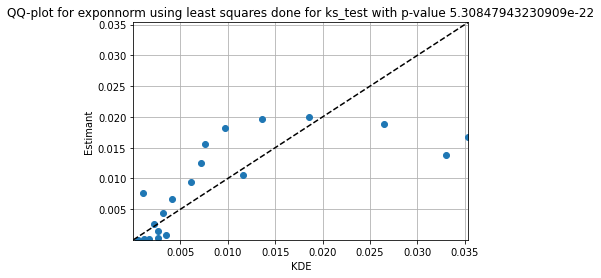

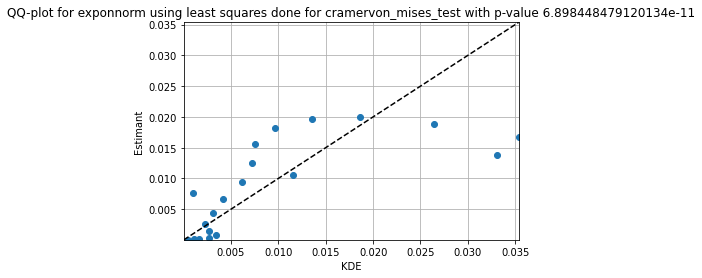

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 100)

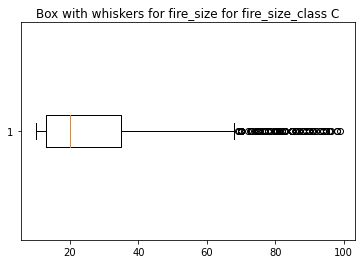

In [6]:
plt.boxplot(df_sampled[property], vert=False)
WHISKERS_FOLDER = './figures/whiskers/'
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()